In [2]:
import scanpy as sc
#import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
#import skimage
from Bio import Phylo
import seaborn as sns
from phylodm import PhyloDM
import tangram as tg

In [3]:
from src import Mapper
from src import temso_utils
import logging

from scipy.spatial import distance
from biotite.sequence.phylo import neighbor_joining

In [4]:
import os
path = os.path.join('./data', 'spatial_map_starmap.csv')
ad_sp = pd.read_csv(path,sep = "\t")

In [5]:
ad_sp

,cellid,x,y,cell_type,batchid
0,4493.100,-621.671955,-24.418036,Olig2,1
1,4493.200,-356.547142,42.145010,intermediate,1
2,4493.300,564.890490,42.767521,intermediate,1
3,4493.400,-753.251351,6.485972,Olig2,1
4,4493.500,-653.631044,-46.138122,Olig2,1
...,...,...,...,...,...
2555,6377.252,606.939488,-13.533910,L5,10
2556,6377.253,-338.680652,-6.581162,L5,10
2557,6377.254,-521.280295,-35.831632,L5,10
2558,6377.255,365.376592,-45.887449,L5,10


In [6]:
colors = {'Astro':'#F8766D', 'Calretinin':'#D89000', 'intermediate':'#A3A500',"L2/3":"#39B600","L4": "#00BF7D","L5": "#00BFC4","L6": "#00B0F6","Olig1": "#9590FF",
          "Olig2": "#E76BF3","PV": "#FF62BC"}
color_list = [colors[group] for group in ad_sp['cell_type']]

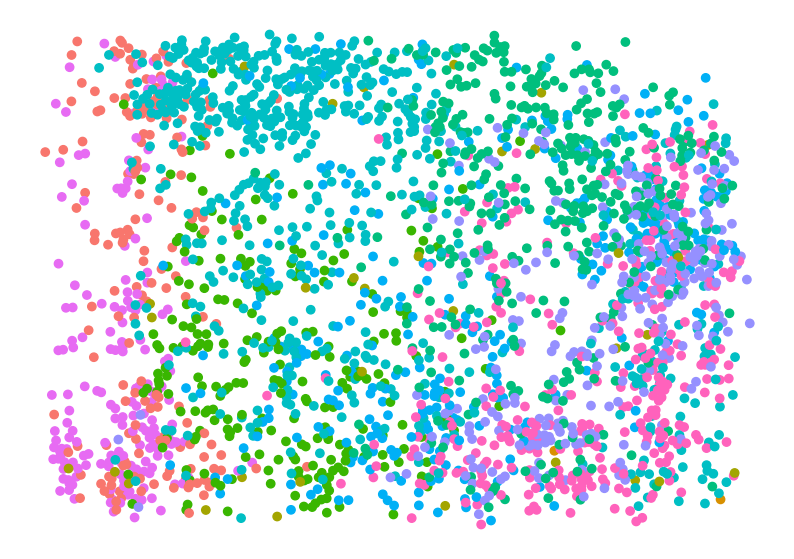

In [7]:
plt.figure(figsize=(10, 7))
xs = ad_sp.x.values
ys = ad_sp.y.values
plt.axis('off')
plt.scatter(xs, ys, c= ad_sp.cell_type.map(colors));
plt.gca().invert_yaxis()

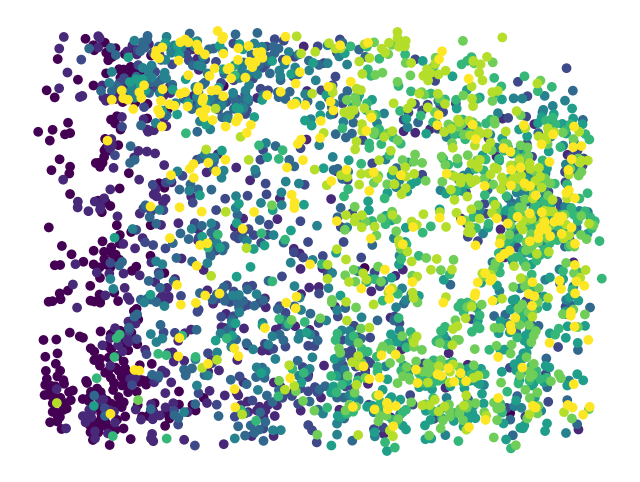

In [8]:
plt.figure(figsize=(8, 6))
xs = ad_sp.x.values
ys = ad_sp.y.values
plt.axis('off')
plt.scatter(xs, ys, c= ad_sp.batchid.values);
plt.gca().invert_yaxis()

In [9]:
X = pd.read_csv('./data/counts_starmap.csv', sep=' ')
anndata_sc = AnnData(X)
X = X.to_numpy()
X.shape

(2560, 500)

In [10]:
cm = pd.read_csv('./data/character_matrix_starmap.txt', sep=' ')
#Z = Z.to_numpy()
cm

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
4493.100,2,0,9,2,0,3,4,0,0,0,...,2,5,0,0,0,8,0,2,2,1
4493.200,2,0,9,2,2,3,4,0,0,0,...,2,5,4,0,0,8,0,0,2,1
4493.300,2,0,9,2,0,3,4,0,0,0,...,2,5,5,0,0,8,0,5,2,1
4493.400,2,0,9,2,0,3,4,37,5,0,...,2,5,5,0,2,8,0,5,2,1
4493.500,4,0,9,0,2,3,4,0,0,0,...,2,5,0,0,3,8,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6377.252,2,0,0,0,2,5,6,0,3,0,...,0,11,0,2,2,2,4,5,3,10
6377.253,2,0,0,2,0,5,6,0,3,0,...,0,0,0,2,2,2,4,5,2,10
6377.254,2,0,0,0,0,5,6,0,3,0,...,0,0,0,2,2,2,4,5,2,10
6377.255,2,0,0,0,0,5,6,0,3,2,...,0,0,0,2,2,2,4,5,2,10


In [11]:
d_hamming = distance.squareform(distance.pdist(cm,metric = "hamming"))
tree = neighbor_joining(d_hamming)
tree_newick = tree.to_newick()
with open("./data/nj_newick_starmap.txt", "w") as text_file:
    text_file.write(tree_newick)
tree_phylo = Phylo.read("./data/nj_newick_starmap.txt", "newick")

In [16]:
import importlib
importlib.reload(temso_utils)
importlib.reload(Mapper)

<module 'src.Mapper' from '/net/csefiles/xzhanglab/xpan78/TemSOMap/src/Mapper.py'>

In [13]:
X = pd.read_csv('./data/counts_starmap.csv', sep=' ')
anndata_sc = AnnData(X)
X = X.to_numpy()

spatial_count = pd.read_csv('./data/spatial_counts_starmap.csv',sep = " ")
Y = spatial_count.to_numpy()

spatial_meta = pd.read_csv('./data/spatial_meta_starmap.csv',sep = ",")
v = spatial_meta[["x", "y"]]
v = v.to_numpy()

cloneid,Z_clone = temso_utils.Define_clones(tree=tree_phylo,num_clones = 16)

d = spatial_meta.density.values

Input tree root has more than 2 children. Will run reroot and binarize the tree.
[Clade(branch_length=0.007426758296787739), Clade(branch_length=0.008750359527766705), Clade(branch_length=0.009016555733978748), Clade(branch_length=0.10531629621982574), Clade(branch_length=0.01740613393485546), Clade(branch_length=0.037922464311122894), Clade(branch_length=0.05565083771944046), Clade(branch_length=0.02920549362897873), Clade(branch_length=0.009577779099345207), Clade(branch_length=0.07815283536911011), Clade(branch_length=0.06950823962688446), Clade(branch_length=0.05186741054058075), Clade(branch_length=0.07855035364627838), Clade(branch_length=0.035146135836839676), Clade(branch_length=0.04501105099916458), Clade(branch_length=0.02984471619129181)]


In [48]:
training_genes = range(500)
lambda_d = 0.5
lambda_g1 = 1
lambda_g2 = 1
lambda_r = 0.1
lambda_l = 0.01
lambda_c = 0
lambda_u = 0
lambda_cu = 0.01
d_source = None

learning_rate = 0.001
random_state = np.random.seed(seed=1234)
num_epochs = 10000


device = "cuda:3"
device = torch.device(device)  # for gpu


print_each = 100

hyperparameters = {
    "lambda_d": lambda_d,  # KL (ie density) term
    "lambda_g1": lambda_g1,  # gene-voxel cos sim
    "lambda_g2": lambda_g2,  # voxel-gene cos sim
    "lambda_r": lambda_r,  # regularizer: penalize entropy
    "lambda_l": lambda_l,  # regularizer: penalize lineage dissimilarity
    "lambda_c": lambda_c,  # regularizer: penalize clone dissimilarity
    "lambda_u": lambda_u, #regularizer: penalize non-unimodal distribution of each cell's inferred location
    "lambda_cu": lambda_cu, #regularizer: penalize non-uniform distribution of the overall distribution of cells
    "d_source": d_source,
}


logging.info(
    "Begin training with {} genes and with density_prior...".format(
        len(training_genes)
    )
)

INFO:root:Begin training with 500 genes and with density_prior...


In [49]:
mapper = Mapper.Mapper(
    X=X, Y=Y, Z=d_hamming, Z_clone=Z_clone, v=v,v_gt=None, d=d, device=device, random_state=random_state, **hyperparameters
)

mapping_matrix, training_history = mapper.train(
    device=device,learning_rate=learning_rate, num_epochs=num_epochs, print_each=print_each
)

INFO:root:Printing scores every 100 epochs.


Score: 0.389, VG reg: 0.844, KL reg: 26.790, Entropy reg: -0.004, Lineage reg: 0.486, Uniformity reg: 2.914
Score: 0.401, VG reg: 0.852, KL reg: 26.815, Entropy reg: -0.004, Lineage reg: 0.428, Uniformity reg: 0.137
Score: 0.414, VG reg: 0.861, KL reg: 26.789, Entropy reg: -0.004, Lineage reg: 0.427, Uniformity reg: 0.121
Score: 0.427, VG reg: 0.870, KL reg: 26.754, Entropy reg: -0.004, Lineage reg: 0.425, Uniformity reg: 0.106
Score: 0.439, VG reg: 0.879, KL reg: 26.714, Entropy reg: -0.004, Lineage reg: 0.425, Uniformity reg: 0.093
Score: 0.451, VG reg: 0.887, KL reg: 26.656, Entropy reg: -0.004, Lineage reg: 0.425, Uniformity reg: 0.080
Score: 0.463, VG reg: 0.895, KL reg: 26.650, Entropy reg: -0.004, Lineage reg: 0.427, Uniformity reg: 0.375
Score: 0.474, VG reg: 0.902, KL reg: 26.573, Entropy reg: -0.004, Lineage reg: 0.430, Uniformity reg: 0.061
Score: 0.486, VG reg: 0.909, KL reg: 26.461, Entropy reg: -0.004, Lineage reg: 0.434, Uniformity reg: 0.054
Score: 0.498, VG reg: 0.916,

In [1]:
spatial_map = pd.read_csv("./data/spatial_map_starmap.csv",sep = "\t")
v_gt = spatial_map[["x", "y"]]
v_gt = v_gt.to_numpy()
MSE_st,MSE_coords,N_mismatches,j_index,j_index_whole,l1_coords,pearson_cor,MSE_density = temso_utils.Benchmark_temso(X,Y,mapping_matrix,v_gt,v,d,method="mean")

NameError: name 'pd' is not defined

In [51]:
print(MSE_coords,N_mismatches,j_index,j_index_whole,l1_coords,pearson_cor,MSE_density )

52908.09038293589 5120 0.009886328124999967 0.01 143.6656710566725 0.48562481064605967 14.593296089385476


In [53]:
spatial_map["clone"] = spatial_map.batchid.values

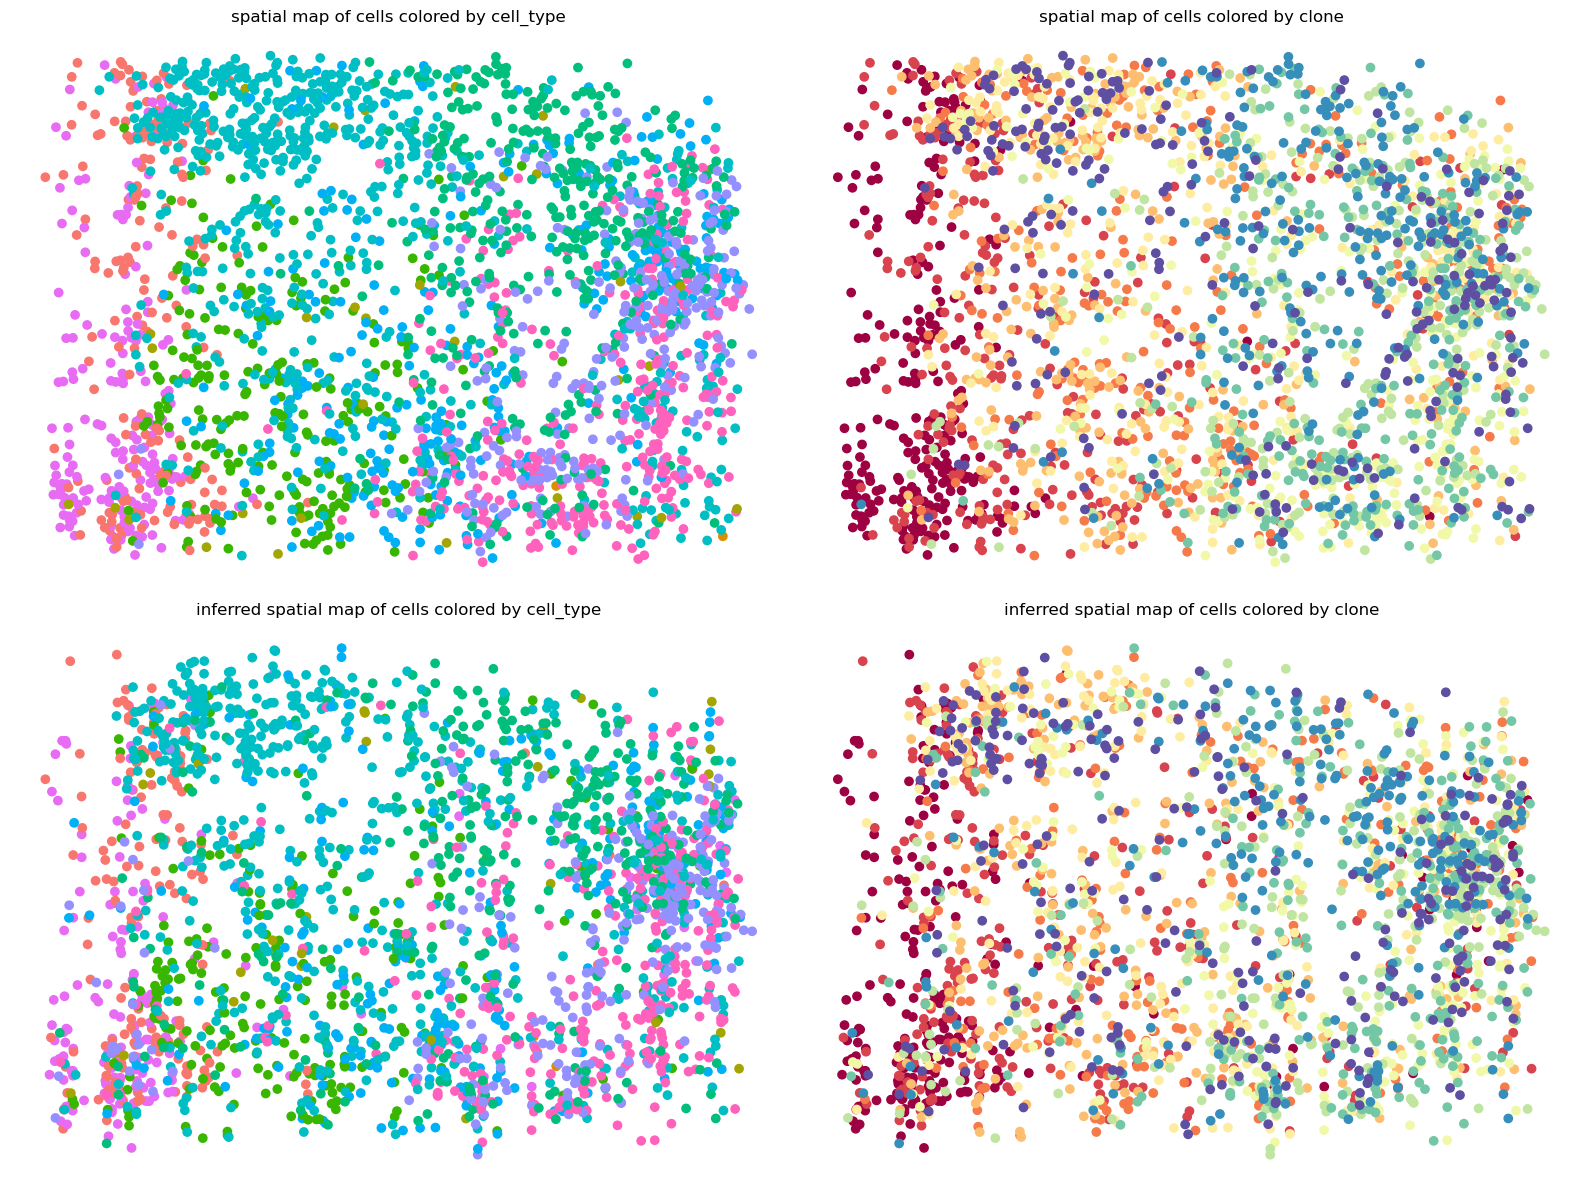

In [55]:
v_pred,M_pred = temso_utils.generate_spatial_map(X,mapping_matrix,v,method = "MAP")

plt.rcParams["figure.figsize"] = (16,12) 


plt.subplot(2,2,1)
xs = spatial_map.x.copy().values
ys = spatial_map.y.copy().values

plt.axis('off')
color_map = "cell_type"
plt.scatter(xs, ys, c= spatial_map[color_map].map(colors));
plt.gca().invert_yaxis()
plt.title("spatial map of cells colored by " + color_map);

plt.subplot(2,2,2)
xs = spatial_map.x.copy().values
ys = spatial_map.y.copy().values

plt.axis('off')
color_map = "clone"
plt.scatter(xs, ys, c= spatial_map[color_map],cmap=plt.cm.Spectral);
plt.gca().invert_yaxis()
plt.title("spatial map of cells colored by " + color_map);

plt.subplot(2,2,3)
xs = v_pred[:,0] + np.random.normal(0, 4, v_pred.shape[0])
ys = v_pred[:,1] + np.random.normal(0, 4, v_pred.shape[0])

plt.axis('off')
color_map = "cell_type"
plt.scatter(xs, ys, c= spatial_map[color_map].map(colors));
plt.gca().invert_yaxis()
plt.title("inferred spatial map of cells colored by " + color_map);

plt.subplot(2,2,4)
plt.axis('off')
color_map = "clone"
plt.scatter(xs, ys, c= spatial_map[color_map],cmap=plt.cm.Spectral);
plt.gca().invert_yaxis()
plt.title("inferred spatial map of cells colored by " + color_map);
plt.tight_layout()
plt.show()
